HW Assignment #3

- Alexander Aranda
- Prof. Ghoraani
- Date: 01/25/2025
- CAP 41613: INTRODUCTION TO DEEP LEARNING
- Link: https://colab.research.google.com/drive/1fUGPPDZALtzb7opINPgspVYFrqSDHuF7?usp=sharing



Threshold-based Classifier.
- We have a two-class classification problem (i.e., C1 and C2).  
- Each data sample is represented by two attributes (x, y).
- The six data samples in class
  - C1:  {(2, 3), (3, 3), (3, 4), (1, 4), (4, 1), (4, 3)},
  - C2:  {(0, 0), (0, 3), (1, 1), (1, 2), (2, 1), (2, 2)}

1. Plot the data samples. The data points in classes C1 and C2 must be in two different colors and shapes. Label the axes and add legends as appropriate.
2. The code asks the user to enter two thresholds thx and thy.
3. The code must use appropriate conditions to prevent common errors such as entering characters instead of numbers etc.
4. Your code calculates and prints the training accuracy based on the user-entered thresholds. To do so, assume that for any data point (x, y) with x>= thx and y>= thy, the data sample belongs to class C1, and C2 if otherwise. Using this rule and the user-entered thresholds, the code calculates the classification accuracy for the six data samples. The classification accuracy is defined as the number of correctly classified data points divided by the total number of data points (12 here).
5. Plot the data samples, the selected thx, and the thx lines.
6. Create a loop to continuously repeat parts (d) to (e) and enter different sets of thresholds each time.
7. The program will exit the loop once the user writes 'x' as an input for either threshold.
8. Based on your observation from the results above, what is a suitable set of thresholds that will give the highest accuracy? Report your suggested thresholds and the corresponding classification accuracy.
Tip: create separate functions for threshold entry, classification, accuracy calculation, and plotting. Set the x and y axes ranges between [-1, 5] in your plots.

Classification Accuracy: 50.00%


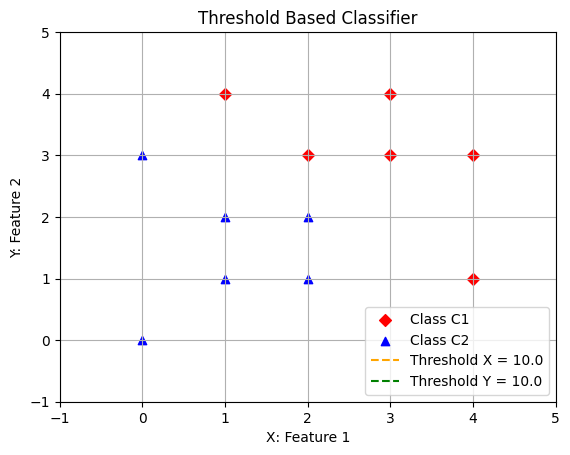

C1 Predictions: [False, False, False, False, False, False]
C2 Predictions: [True, True, True, True, True, True]
Please input a numerical value.
Exiting the program.


In [1]:
import matplotlib.pyplot as plt

# Data samples (C1 & C2)
C1_x = [2, 3, 3, 1, 4, 4]
C1_y = [3, 3, 4, 4, 1, 3]
C2_x = [0, 0, 1, 1, 2, 2]
C2_y = [0, 3, 1, 2, 1, 2]

# Set axis limits
plt.axis([-1, 5, -1, 5])

# Function to get the threshold value from the user
def get_user_threshold(axis):
    while True:
        user_input = input(f"Enter threshold for {axis} axis (th{axis}). Enter 'x' to exit: ")
        if user_input == 'x':  # Check if user wants to exit
            return 'exit'  # Return a special value to indicate exit
        try:
            threshold = float(user_input)  # Try converting input to a float
            return threshold
        except ValueError:
            print("Please input a numerical value.")

# Function to classify the data points based on the thresholds
def classify_data(thx, thy):
    C1_pred = []
    C2_pred = []

    # Classifying C1 data points
    for point in range(len(C1_x)):
        if C1_x[point] >= thx and C1_y[point] >= thy:
            C1_pred.append(True)  # Correctly classified as C1
        else:
            C1_pred.append(False)  # Incorrectly classified as C2

    # Classify C2 data points
    for point in range(len(C2_x)):
        if C2_x[point] < thx or C2_y[point] < thy:  # If either x or y is less than threshold, it's C2
            C2_pred.append(True)  # Correctly classified as C2
        else:
            C2_pred.append(False)  # Misclassified as C1

    return C1_pred, C2_pred

# Function to calculate the accuracy of classification
def find_accuracy(C1_pred, C2_pred):
    correct_predictions = 0
    # Count correct predictions in C1
    correct_predictions += C1_pred.count(True)
    # Count correct predictions in C2
    correct_predictions += C2_pred.count(True)

    total_predictions = len(C1_pred) + len(C2_pred)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Function to plot the data and the thresholds
def plot_data(C1_x, C1_y, C2_x, C2_y, thx, thy):
    plt.scatter(C1_x, C1_y, color="red", marker="D", label="Class C1")
    plt.scatter(C2_x, C2_y, color="blue", marker="^", label="Class C2")

    # Plotting the threshold lines using plt.plot
    plt.plot([thx, thx], [-1, 5], color="orange", linestyle="--", label=f"Threshold X = {thx}")  # Vertical line
    plt.plot([-1, 5], [thy, thy], color="green", linestyle="--", label=f"Threshold Y = {thy}")  # Horizontal line

    plt.xlabel("X: Feature 1")
    plt.ylabel("Y: Feature 2")
    plt.legend()
    plt.title("Threshold Based Classifier")
    plt.grid(True)
    plt.show()

# Main loop for getting thresholds, classifying data, and plotting results
while True:
    thx = get_user_threshold("x")  # Get threshold for x-axis
    if thx == 'exit':  # If user types 'x' to exit
        print("Exiting the program.")
        break

    thy = get_user_threshold("y")  # Get threshold for y-axis
    if thy == 'exit':  # If user types 'x' to exit
        print("Exiting the program.")
        break

    # Classify data points based on the thresholds
    C1_pred, C2_pred = classify_data(thx, thy)

    # Calculate the classification accuracy
    accuracy = find_accuracy(C1_pred, C2_pred)
    print(f"Classification Accuracy: {accuracy:.2f}%")

    # Plot the data points and the thresholds
    plot_data(C1_x, C1_y, C2_x, C2_y, thx, thy)

    # Checking correctly and incorrectly classified values
    print("C1 Predictions:", C1_pred)
    print("C2 Predictions:", C2_pred)